# Integrales de Movimiento en el Problema de los N-cuerpos

In [359]:
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from numpy.linalg import norm
%matplotlib inline

# Sistema de Ecuaciones diferenciales

In [360]:
# Ecuaciones diferenciales para el sistema de N-cuerpos
def eom(y,t,masas):
    M=len(y);N=M/6
    r=zeros((N,3));v=zeros((N,3))
    drdt=zeros((N,3));dvdt=zeros((N,3))    
    for i in xrange(N):
        r[i]=y[3*i:3*i+3];
        v[i]=y[3*N+3*i:3*N+3*i+3]

    # Derivadas
    for i in xrange(N):
        drdt[i]=v[i]
        for j in xrange(N):
            if i==j:continue
            dvdt[i]+=-masas[j]/norm(r[i]-r[j])**3*(r[i]-r[j])

    # Devuelve derivadas
    dydt=array([])
    for i in xrange(N):dydt=concatenate((dydt,drdt[i]))
    for i in xrange(N):dydt=concatenate((dydt,dvdt[i]))
    return dydt

# Definición de las propiedades del Sistema

In [361]:
# Define el sistema de partículas
sistema=dict(
    particula1=dict(
        m=1.0,
        r=[1,0,0],
        v=[0,0.5,0]),
    particula2=dict(
        m=1.0,
        r=[-1,0,0],
        v=[0,-0.5,0.5],
    ),
    particula3=dict(
        m=1.0,
        r=[0,1,0],
        v=[0,0,1]
    )
)

# Prepara el Sistema de Partículas
masas=[]
rs=[];vs=[];ys=[]
for i in sistema.keys():
    particula=sistema[i]
    if particula['m']>0:
        masas+=[particula['m']]
        rs+=particula['r'];vs+=particula['v']
ys=rs+vs
M=len(ys)
N=M/6
Masa=sum(masas)

# Solución al Problema

In [362]:
Nt=1000
ts=linspace(0,10,Nt)

solucion=odeint(eom,ys,ts,args=(masas,))

rs=zeros((N,Nt,3))
vs=zeros((N,Nt,3))
for i in xrange(N):
    n=3*i
    rs[i]=solucion[:,n:n+3]
    m=3*N+3*i
    vs[i]=solucion[:,m:m+3]

# Integrales de Movimiento

In [363]:
# Momento total
P=zeros((Nt,3))

for it in xrange(Nt):
    for n in xrange(N):
        P[it]+=masas[n]*vs[n,it]

it=0
print "Momento total en t = %.2f, P = "%(ts[it]),P[it]

Momento total en t = 0.00, P =  [ 0.   0.   1.5]


In [364]:
# Posición del Centro de Masa
R = zeros((Nt,3))
for it in xrange(Nt):
    for n in xrange(N):
        R[it]+=masas[n]*rs[n,it]/Masa

it=0
print "Posición del Centro de Masa en t = %.2f, R = "%(ts[it]),R[it]

Posición del Centro de Masa en t = 0.00, R =  [ 0.          0.33333333  0.        ]


In [365]:
# Momento Angular
L = zeros((Nt,3))
for it in xrange(Nt):
    for n in xrange(N):
        L[it]+=masas[n]*cross(rs[n,it],vs[n,it])
        
it=1
print "Momento total en t = %.2f, L = "%(ts[it]),L[it]


Momento total en t = 0.01, L =  [ 1.          0.49999999  1.        ]


In [366]:
# Energía
K = zeros(Nt)
U = zeros(Nt)
E = zeros(Nt)

for it in xrange(Nt):
    for n in xrange(N):
        K[it]+=0.5*masas[n]*norm(vs[n,it])**2
        for m in xrange(N):
            if n==m:continue
            U[it]+=-0.5*masas[n]*masas[m]/norm(rs[n,it]-rs[m,it])
    E[it]=K[it]+U[it]

it=20
print "Energía total en t = %.2f, E = "%(ts[it]),E[it]

Energía total en t = 0.20, E =  -1.03921356516


# Gráficas

(-3, 3)

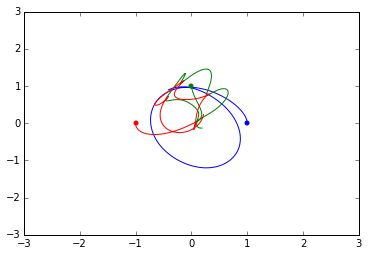

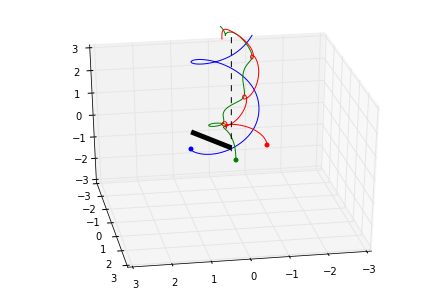

In [367]:
# Graficar en 3D
fig2d = plt.figure()
fig3d = plt.figure()

ax3d=Axes3D(fig3d)
ax2d=fig2d.gca()

for i in xrange(N):
    n=3*i
    r=solucion[:,n:n+3]
    
    # Grafica en 3D
    line,=ax3d.plot(r[:,0],r[:,1],r[:,2])
    color=line.get_color()
    ax3d.plot(r[0:1,0],r[0:1,1],r[0:1,2],'o',color=color,markersize=5,markeredgecolor='none')
    
    # Grafica en 2D
    ax2d.plot(r[:,0],r[:,1],color=color)
    ax2d.plot(r[0,0],r[0,1],'o',color=color,markersize=5,markeredgecolor='none')
    
    
# Grafica el Centro de Masa
ax3d.plot(R[:,0],R[:,1],R[:,2],'k--')
ax2d.plot(R[:,0],R[:,1],'k--')

# Gráfica el Vector de Momento Angular
ax3d.plot([0,L[0,0]],[0,L[0,1]],[0,L[0,2]],'k',linewidth=5)

ax3d.view_init(elev=30,azim=80)

ext=3
ax3d.set_xlim(-ext,ext)
ax3d.set_ylim(-ext,ext)
ax3d.set_zlim(-ext,ext)
ax2d.set_xlim(-ext,ext)
ax2d.set_ylim(-ext,ext)